# 📊 Predicting House Prices with Linear Regression
## 📝 Project Overview
### The goal of this project is to **predict house prices** based on various features such as location, size, number of rooms, and other property characteristics.
### **Workflow:**
### 1. Data Collection
### 2. Data Exploration and Cleaning
### 3. Feature Selection
### 4. Model Training
### 5. Model Evaluation
### 6. Visualizations
### 7. Conclusion



## 1️⃣ Data Collection
### Load the dataset and convert categorical features to numerical for machine learning.


In [6]:
# Step 1: Data Collection
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Housing.csv")

# Display first 5 rows

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 2️⃣ Data Exploration and Cleaning
### Check for missing values, visualize correlations, and explore relationships between variables.


In [7]:
# Step 2: Data Exploration and Cleaning

import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("Dataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


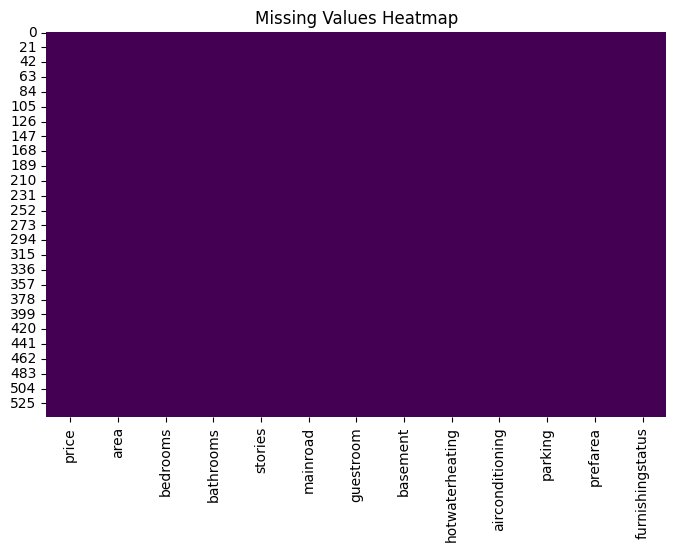

In [8]:
# Missing values heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()



In [9]:
# Basic statistics
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


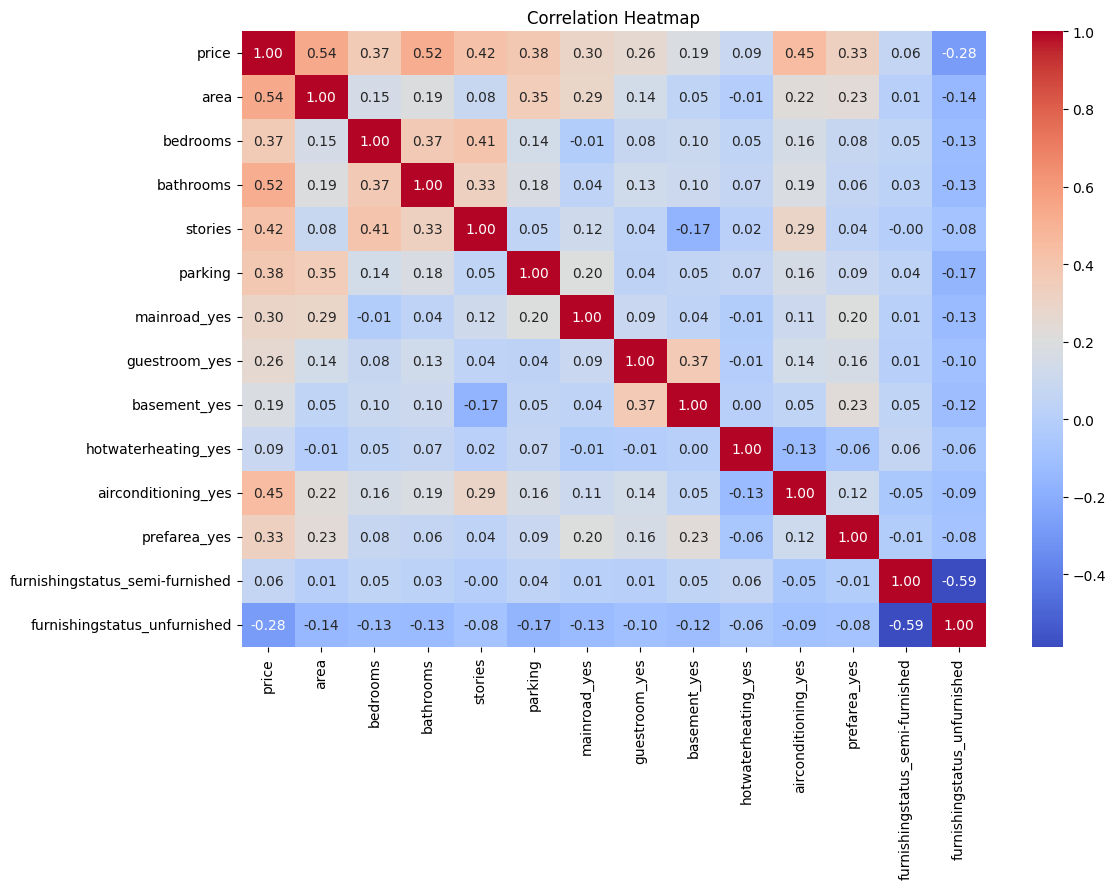

In [22]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




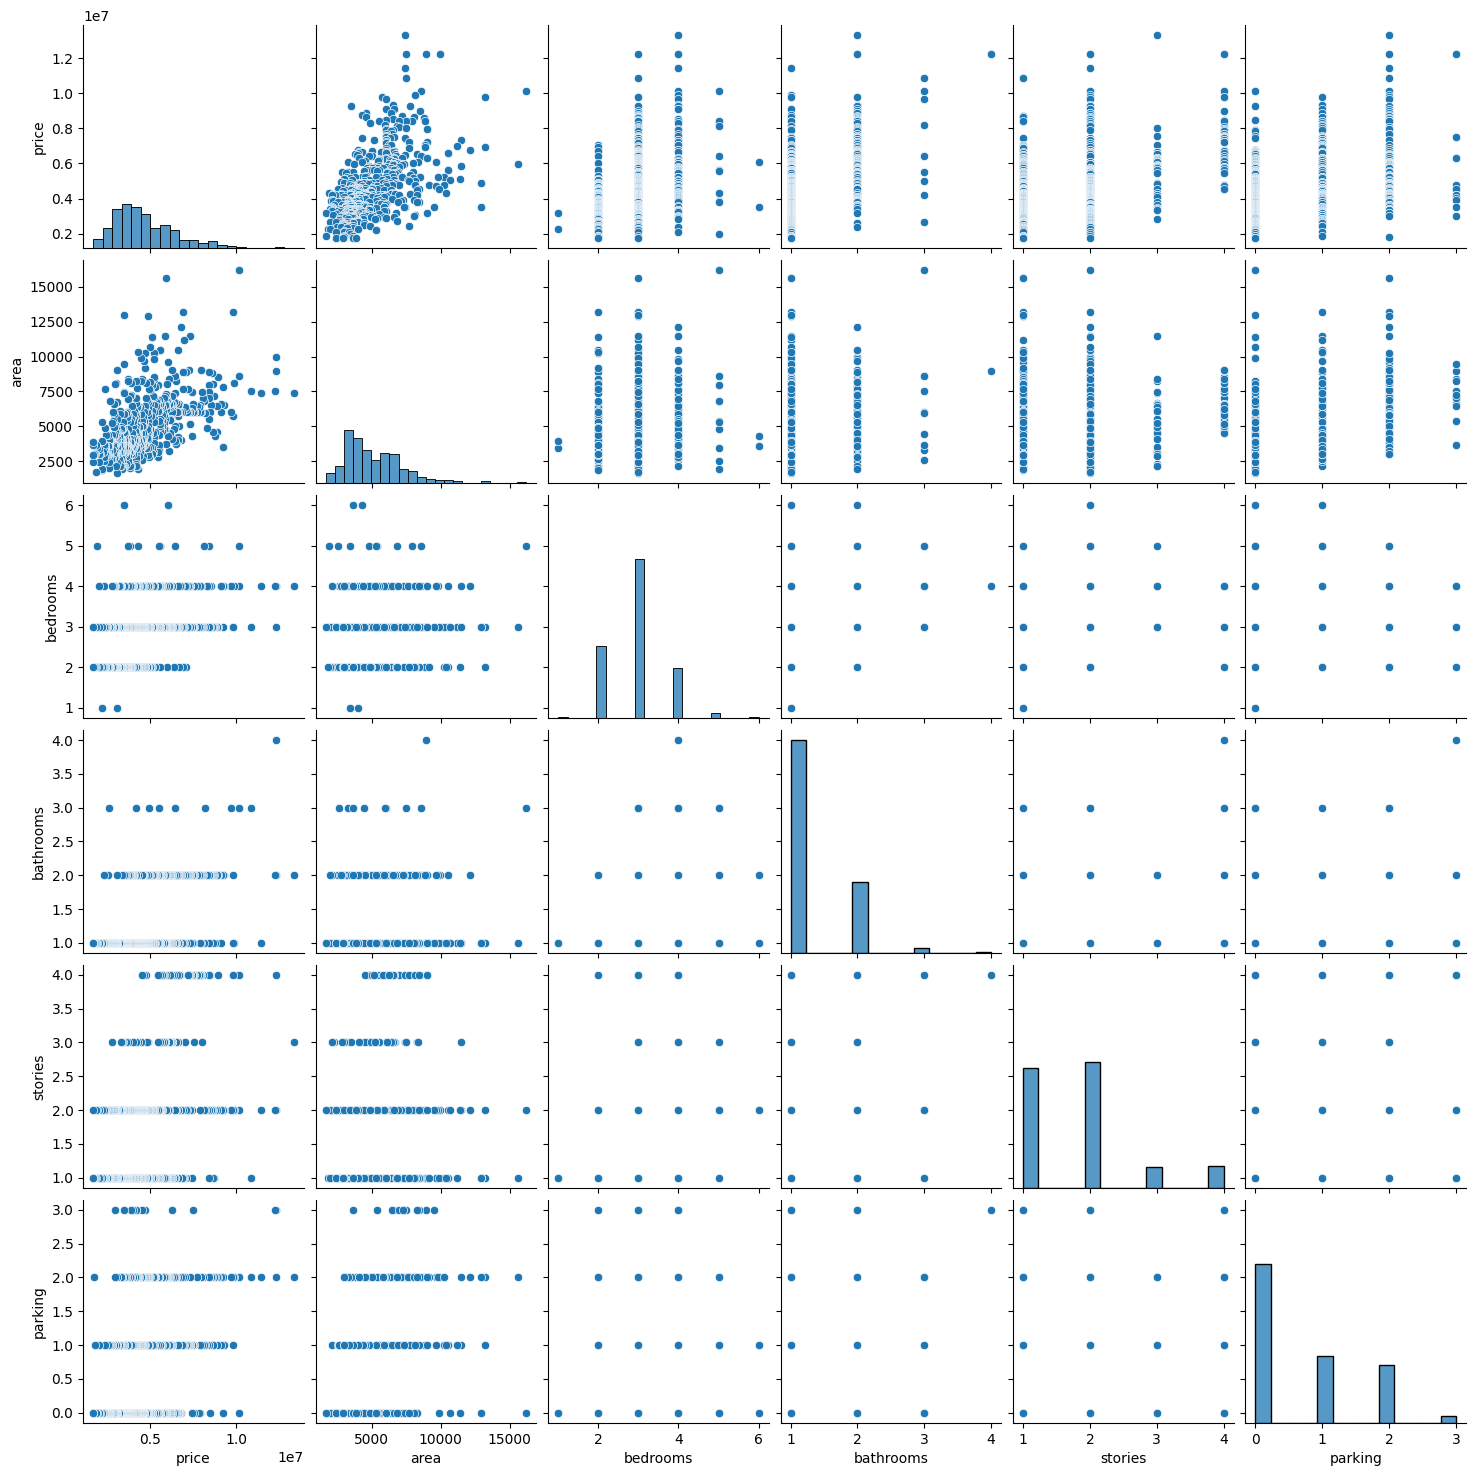

In [11]:
# Pairplot for quick relationship overview (only numeric)
sns.pairplot(df.select_dtypes(include=['float64','int64']))
plt.show()



In [12]:
# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)


## 3️⃣ Feature Selection
### Separate features (X) and target variable (y).

In [13]:
# Step 3: Feature Selection
X = df.drop("price", axis=1)  # Replace 'price' with your target column if different
y = df["price"]


## 4️⃣ Model Training
### Split the dataset and train a **Linear Regression** model.

In [14]:
# Step 4: Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 5️⃣ Model Evaluation
### Evaluate performance using **MSE, RMSE, and R²**.

In [15]:
# Step 5: Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 1754318687330.6643
Root Mean Squared Error (RMSE): 1324506.9600914388
R-squared: 0.6529242642153184


## 6️⃣ Visualizations
### Visual insights into model performance and feature importance.

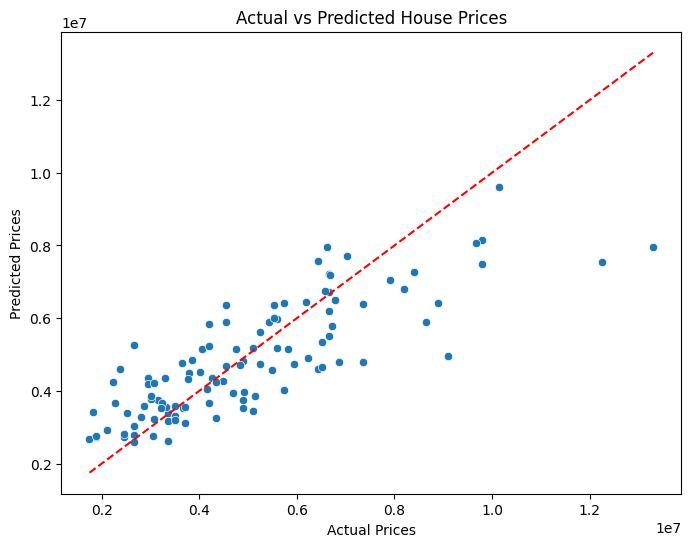

In [16]:
# Step 6: Visualization

# Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


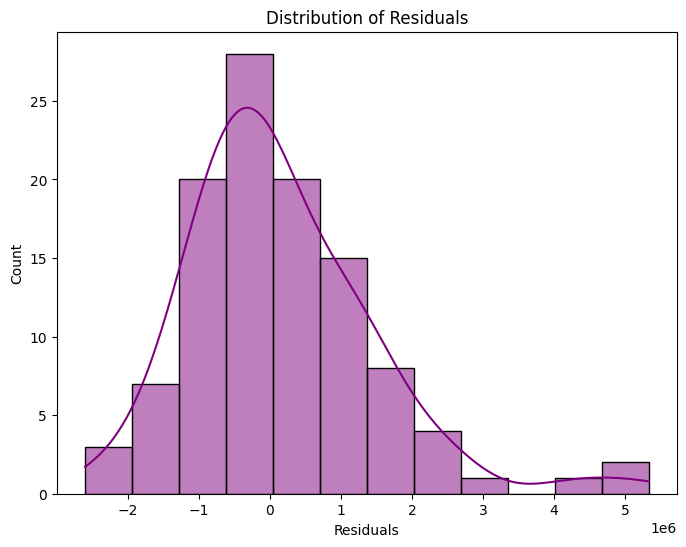

In [17]:
# Residuals Distribution
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()



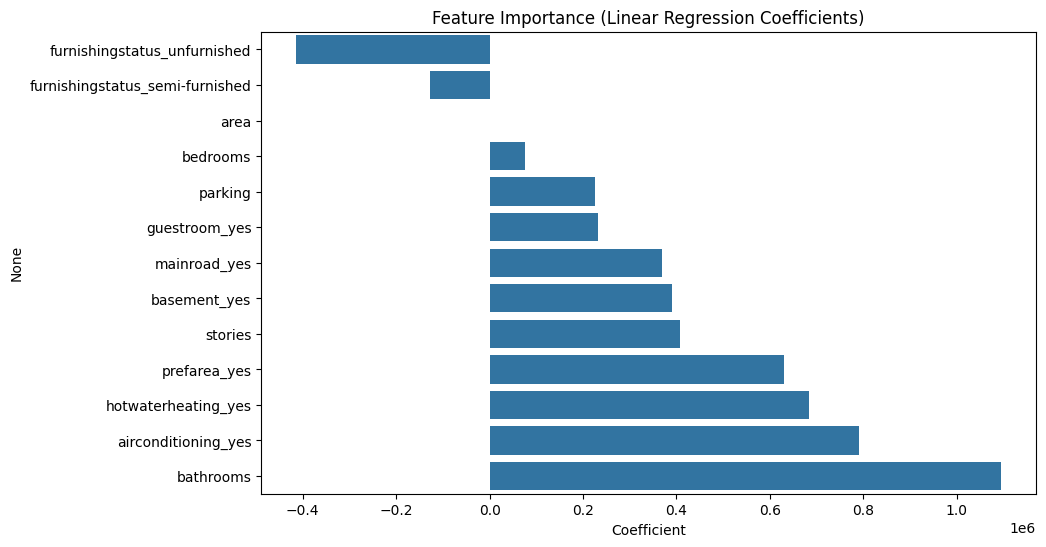

In [18]:
# Feature Importance (based on coefficients)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient')
plt.figure(figsize=(10,6))
sns.barplot(x=coeff_df.Coefficient, y=coeff_df.index)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()



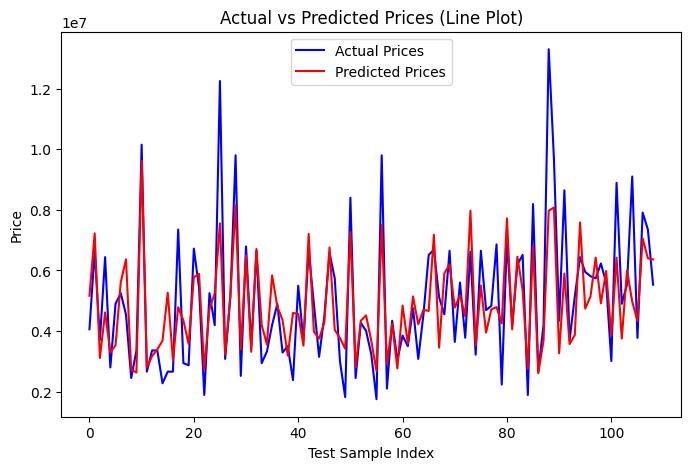

In [19]:
# Predicted vs Actual line plot
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title("Actual vs Predicted Prices (Line Plot)")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()



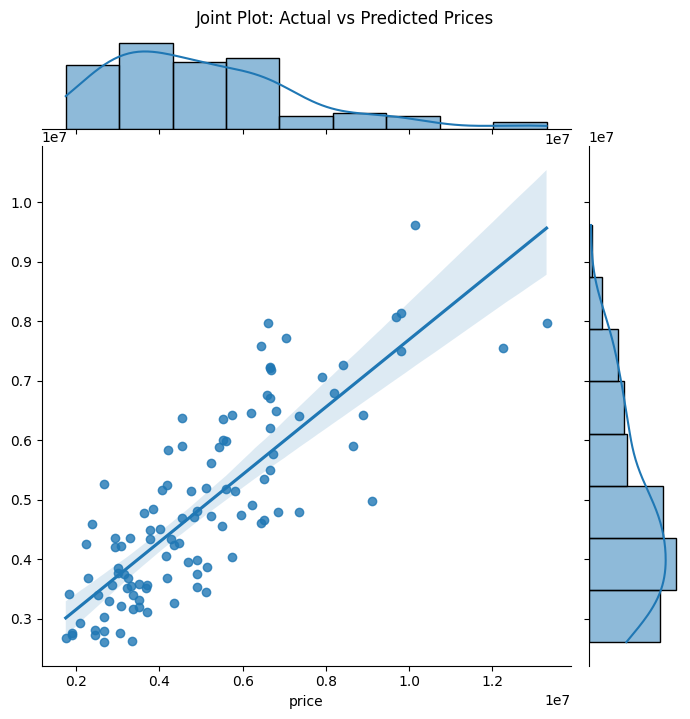

In [20]:
# Jointplot for predicted vs actual
sns.jointplot(x=y_test, y=y_pred, kind='reg', height=7)
plt.suptitle("Joint Plot: Actual vs Predicted Prices", y=1.02)
plt.show()

## 7️⃣ Conclusion
 
### **Key Takeaways:**
### - The model successfully predicts house prices with reasonable accuracy.
### - Some features have stronger effects on prices, as seen in the feature importance plot.
### - The residuals are relatively normally distributed, suggesting a good model fit.

### **Next Steps:**
### - Add more features or engineered variables.
### - Try advanced models like Random Forest or XGBoost.
### - Perform hyperparameter tuning.

In [21]:
# Create DataFrame for comparison
results_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

# Add an error column
results_df["Error"] = results_df["Actual Price"] - results_df["Predicted Price"]

# Show first 10 rows
results_df.head(10)


,Actual Price,Predicted Price,Error
0,4060000,5.164654e+06,-1.104654e+06
1,6650000,7.224722e+06,-5.747223e+05
2,3710000,3.109863e+06,6.001368e+05
3,6440000,4.612075e+06,1.827925e+06
4,2800000,3.294646e+06,-4.946463e+05
5,4900000,3.532275e+06,1.367725e+06
6,5250000,5.611775e+06,-3.617746e+05
7,4543000,6.368146e+06,-1.825146e+06
8,2450000,2.722857e+06,-2.728570e+05
9,3353000,2.629406e+06,7.235944e+05
